In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,8)

In [2]:
from sklearn import preprocessing
from sklearn.linear_model import logistic

In [9]:
def processing(pd_df):
    a = pd_df['Class']
    b = pd_df.drop(['Time','Class'],axis = 1)
    return a,b

In [3]:
credit_fraud = pd.read_csv('creditcard.csv') # loading csv dataset into Notebook

In [17]:
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

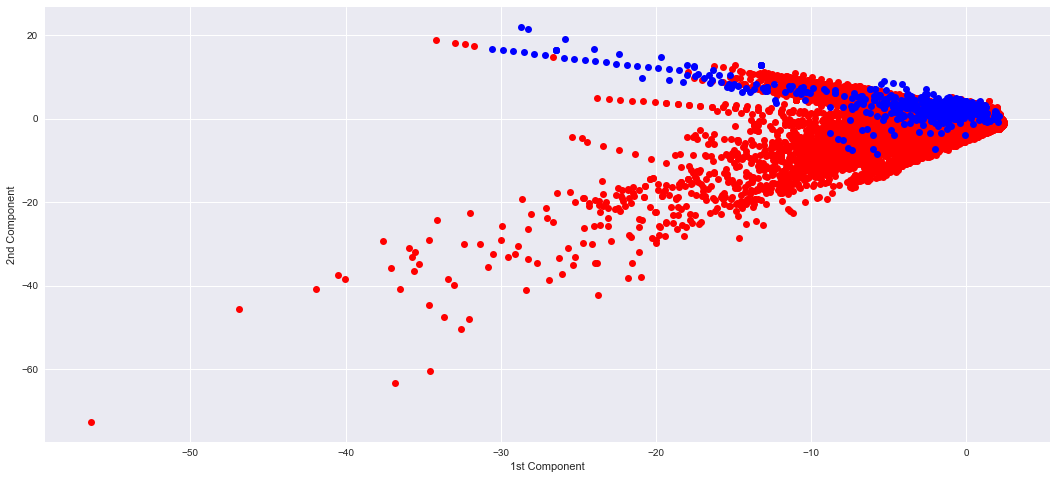

In [37]:
plt.plot(credit_fraud[credit_fraud['Class']==0]['V1'],credit_fraud[credit_fraud['Class']==0]['V2'],'ro')
plt.plot(credit_fraud[credit_fraud['Class']==1]['V1'],credit_fraud[credit_fraud['Class']==1]['V2'],'bo')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')

(array([  2.75992000e+05,   6.01000000e+03,   1.53900000e+03,
          6.27000000e+02,   2.27000000e+02,   1.44000000e+02,
          9.20000000e+01,   6.90000000e+01,   3.30000000e+01,
          2.20000000e+01,   1.00000000e+01,   1.10000000e+01,
          5.00000000e+00,   5.00000000e+00,   5.00000000e+00,
          5.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

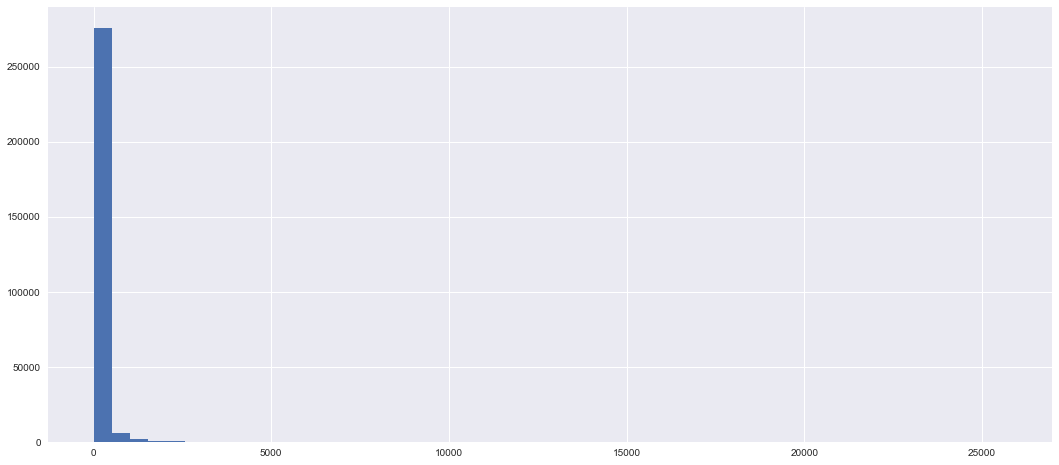

In [8]:
plt.hist(credit_fraud['Amount'], bins=50)# the only known and understandable colunm is Amount, it is extremely skewed.  

In [18]:
target = credit_fraud['Class'] # seperate target from the rest of the data

In [19]:
credit_fraud_analysis = credit_fraud.drop(['Time','Class'],axis = 1)

In [20]:
x = credit_fraud_analysis
y = target

In [26]:
from sklearn.model_selection import train_test_split     #seperate imbalanced dataset into training and testing, !stratify parameter)
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                stratify=y, 
                                                test_size=0.30)

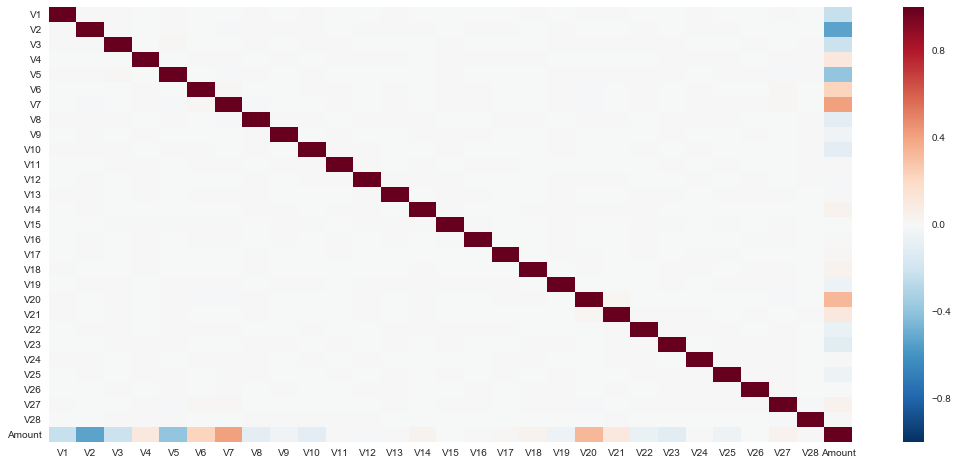

In [28]:
sns.heatmap(X_train.corr())

In [10]:
credit_fraud_analysis = preprocessing.normalize(credit_fraud_analysis)

In [11]:
credit_fraud_analysis = pd.DataFrame(credit_fraud_analysis)

In [21]:
credit_fraud_analysis.columns = credit_fraud.columns[1:30]

In [22]:
credit_fraud_analysis.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.009085,-0.000486,0.016946,0.009208,-0.002260,0.003089,0.001601,0.000659,0.002431,0.000607,...,0.001680,-0.000122,0.001856,-0.000738,0.000447,0.000859,-0.001264,0.000892,-0.000141,0.999658
1,0.314200,0.070163,0.043888,0.118143,0.015822,-0.021712,-0.020774,0.022435,-0.067336,-0.044018,...,-0.018212,-0.059519,-0.168368,0.026702,-0.089591,0.044070,0.033189,-0.002368,0.003882,0.709144
2,-0.003587,-0.003539,0.004682,0.001003,-0.001329,0.004754,0.002090,0.000654,-0.004000,0.000548,...,0.001386,0.000655,0.002038,0.002401,-0.001820,-0.000865,-0.000367,-0.000146,-0.000158,0.999871
3,-0.007819,-0.001499,0.014509,-0.006986,-0.000083,0.010093,0.001923,0.003054,-0.011224,-0.000445,...,-0.001684,-0.000876,0.000043,-0.001540,-0.009513,0.005239,-0.001796,0.000508,0.000497,0.999399
4,-0.016527,0.012525,0.022099,0.005751,-0.005810,0.001369,0.008461,-0.003860,0.011669,0.010746,...,0.005830,-0.000135,0.011391,-0.001961,0.002016,-0.002940,0.007167,0.003131,0.003070,0.998705


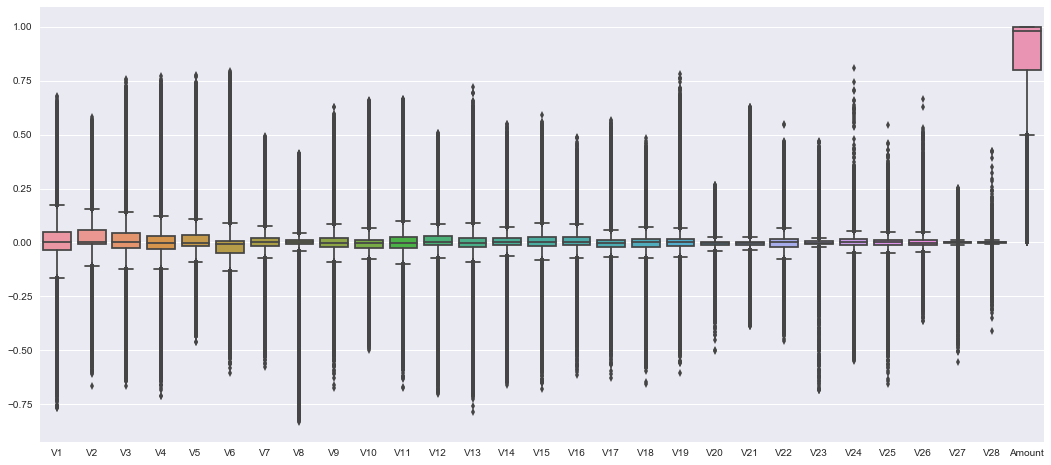

In [32]:
sns.boxplot(data = credit_fraud_analysis)

In [39]:
logit = logistic.LogisticRegression()
logit.fit(credit_fraud_analysis, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
a = logit.predict(credit_fraud_analysis)

492